# 

In [10]:
import pandas as pd

# Load dataset (skip first two rows)
file_path = "tesla_stock_data_2000_2025.csv"
df = pd.read_csv(file_path, skiprows=2)

# Rename columns correctly
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Remove rows where 'Date' is NaT
df = df.dropna(subset=["Date"])

# Convert numeric columns to proper types
numeric_cols = ["Close", "High", "Low", "Open", "Volume"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Forward fill missing values properly
df.ffill(inplace=True)  # Use ffill() instead of fillna(method='ffill')

# Sort by Date
df = df.sort_values(by="Date").reset_index(drop=True)

# Verify missing values
print("Missing values:\n", df.isnull().sum())

# Save cleaned data
df.to_csv("cleaned_tesla_stock_data.csv", index=False)

# Display dataset info
print(df.info())
print(df.head())


Missing values:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3692 non-null   datetime64[ns]
 1   Close   3692 non-null   float64       
 2   High    3692 non-null   float64       
 3   Low     3692 non-null   float64       
 4   Open    3692 non-null   float64       
 5   Volume  3692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 173.2 KB
None
        Date     Close      High       Low      Open     Volume
0 2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1 2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2 2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3 2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4 2010-07-06  1.074000  1.333333  1.055333  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_tesla_stock_data.csv")

# Display basic information
print(df.info())
print(df.head())  # Show the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3692 non-null   object 
 1   Close   3692 non-null   float64
 2   High    3692 non-null   float64
 3   Low     3692 non-null   float64
 4   Open    3692 non-null   float64
 5   Volume  3692 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 173.2+ KB
None
         Date     Close      High       Low      Open     Volume
0  2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1  2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2  2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3  2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4  2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [13]:
print(df.isnull().sum())  # Count missing values in each column


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [14]:
print(df.describe())  # Get summary statistics of numerical columns


             Close         High          Low         Open        Volume
count  3692.000000  3692.000000  3692.000000  3692.000000  3.692000e+03
mean     84.684063    86.583019    82.720395    84.724803  9.647972e+07
std     111.289879   113.897252   108.647448   111.413059  7.736170e+07
min       1.053333     1.108667     0.998667     1.076000  1.777500e+06
25%      12.226501    12.447833    12.011500    12.238833  4.938900e+07
50%      18.326334    18.641334    17.938334    18.325000  8.192955e+07
75%     182.869999   186.305000   178.772499   182.982506  1.216402e+08
max     479.859985   488.540009   457.510010   475.899994  9.140820e+08


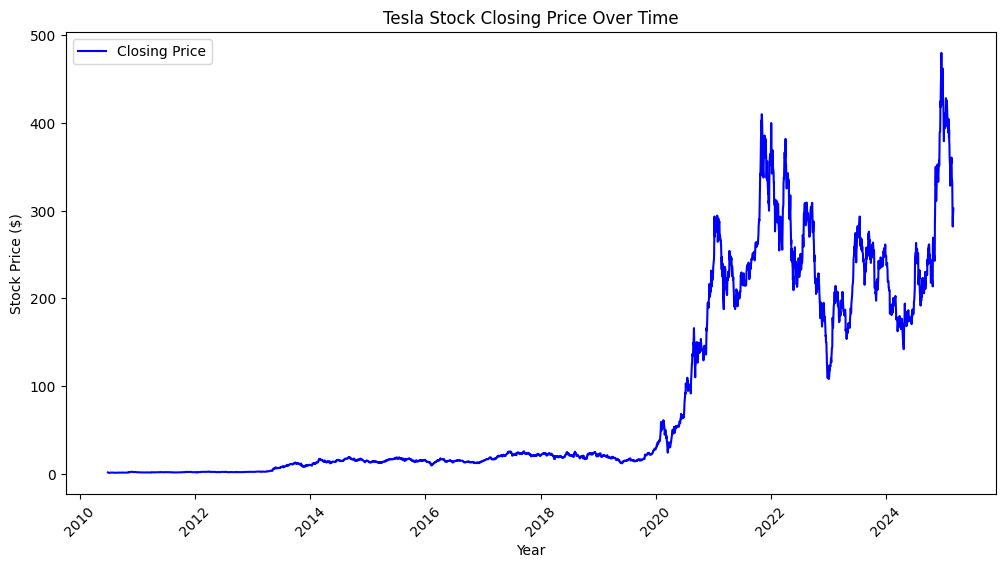

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_tesla_stock_data.csv")

# Convert 'Date' to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Plot the Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='b')
plt.xlabel("Year")
plt.ylabel("Stock Price ($)")
plt.title("Tesla Stock Closing Price Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


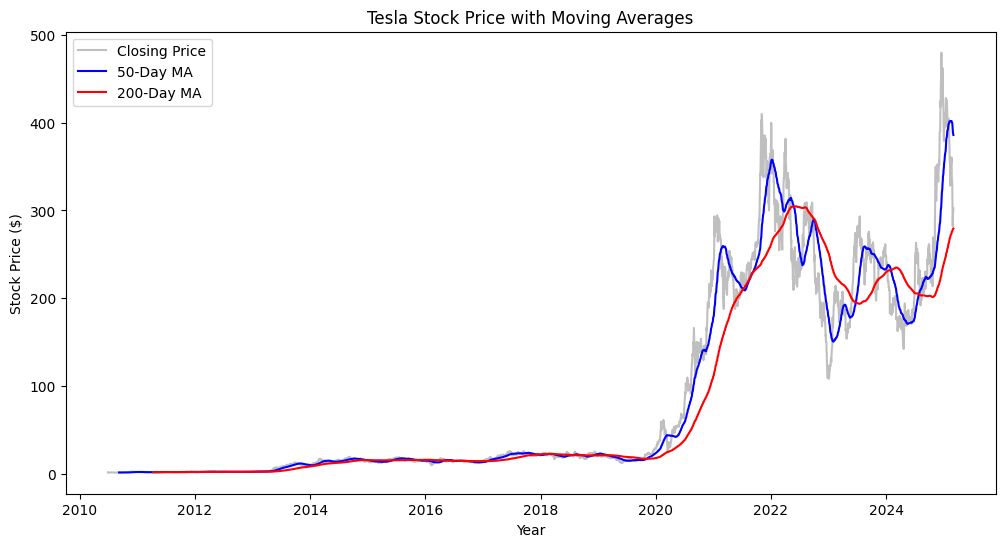

In [4]:
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
df['MA200'] = df['Close'].rolling(window=200).mean()  # 200-day moving average

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='gray', alpha=0.5)
plt.plot(df['Date'], df['MA50'], label="50-Day MA", color='blue')
plt.plot(df['Date'], df['MA200'], label="200-Day MA", color='red')
plt.xlabel("Year")
plt.ylabel("Stock Price ($)")
plt.title("Tesla Stock Price with Moving Averages")
plt.legend()
plt.show()


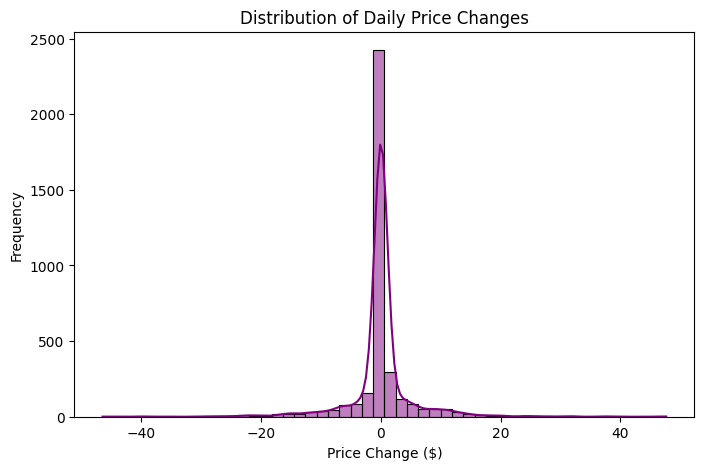

In [5]:
df['Daily Change'] = df['Close'].diff()  # Calculate daily changes

plt.figure(figsize=(8,5))
sns.histplot(df['Daily Change'].dropna(), bins=50, kde=True, color='purple')
plt.title("Distribution of Daily Price Changes")
plt.xlabel("Price Change ($)")
plt.ylabel("Frequency")
plt.show()


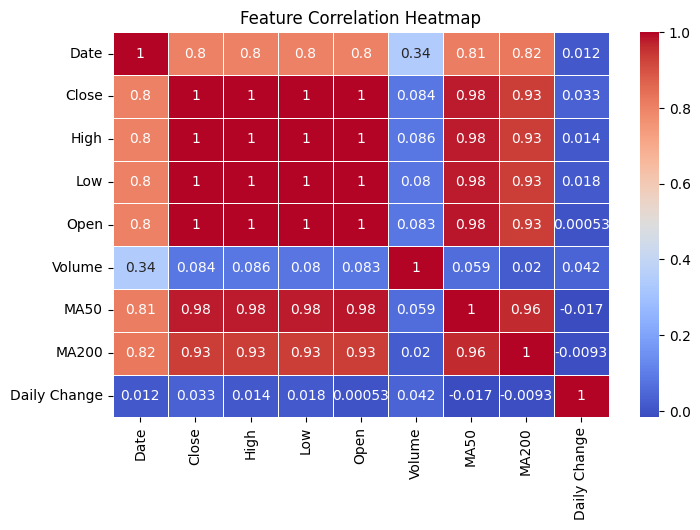

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [30]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv("cleaned_tesla_stock_data.csv")

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use only the 'Close' price for prediction
data = df[['Close']].values  

# Normalize data (LSTM works better with scaled data)
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)


In [32]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Past 'seq_length' days
        y.append(data[i+seq_length])    # Next day's price
    return np.array(X), np.array(y)

# Define sequence length (e.g., last 60 days of stock price)
seq_length = 60  
X, y = create_sequences(data_scaled, seq_length)

# Split into train (80%) and test (20%)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [33]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Predict the closing price
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\Chaudhary Usman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0070 - val_loss: 0.0026
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 8.1409e-04 - val_loss: 0.0017
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 7.8077e-04 - val_loss: 0.0016
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 6.8360e-04 - val_loss: 0.0025
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 5.9942e-04 - val_loss: 0.0017
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 4.8488e-04 - val_loss: 0.0027
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 5.8311e-04 - val_loss: 0.0012
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 5.3992e-04 - val_loss: 0.0018
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 5.6439e-04 - val_loss: 0.0011
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 4.9379e-04 - val_loss: 9.8226e-04
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 4.6039e-04 - val_loss: 9.96

In [34]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Convert back to actual scale
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))  # Actual prices


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


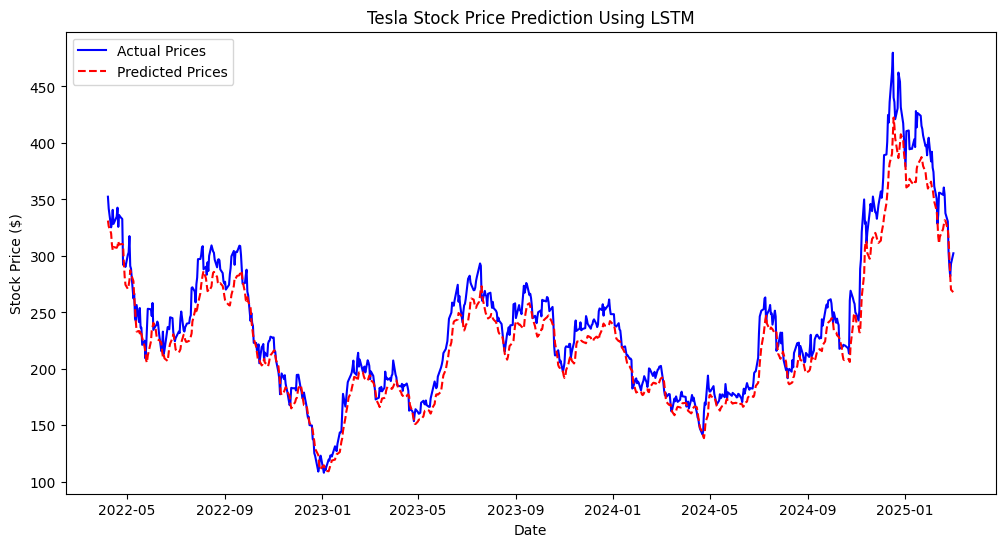

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(actual_prices):], actual_prices, color='blue', label="Actual Prices")
plt.plot(df.index[-len(predicted_prices):], predicted_prices, color='red', linestyle="dashed", label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Tesla Stock Price Prediction Using LSTM")
plt.legend()
plt.show()
